This notebook shows the process for optimizing the buy/gain adjustment table. The original matrix is the adjustment matrix for the avatar Bonnie. The matrix at the end is for the avatar Chelsea. Win rates for each are shown at the end to demonstrate the improvement. This code takes a long time to run because each game is affected by random shuffling as well as card purchasing decisions.

In [13]:
import Dominion
import optimize_table
import pandas
import random
import matplotlib.pyplot as plt

In [6]:
active_rows="Adventurer,Bureaucrat,Council Room,Festival,Laboratory,\
Market,Militia,Moat,Smithy,Village,Witch,Gardens".split(",")
adf_Bonnie=pandas.read_csv("Bonnie_adjustment_matrix.csv",index_col=0)
rounds=10
gamesperround=8000

In [7]:
Chelsea_adf=optimize_table.optimize(adf_Bonnie,active_rows,rounds,gamesperround)

Optimization round 1
('Bureaucrat', 'Witch'):0 --> 40
('Festival', 'Festival'):520 --> 484
('Festival', 'Witch'):0 --> 48
('Laboratory', 'Witch'):0 --> 17
('Militia', 'Witch'):0 --> 43
('Village', 'Witch'):0 --> 50
('Witch', 'Witch'):510 --> 560
('Gardens', 'Gold'):0 --> 39
('Gold', 'Gold'):600 --> 640
Optimization round 2
('Smithy', 'Witch'):0 --> 43
('Smithy', 'Province'):0 --> 26
('Village', 'Village'):0 --> 41
('Gardens', 'Adventurer'):0 --> -50
('Province', 'Province'):800 --> 804
Optimization round 3
('Festival', 'Province'):0 --> 31
('Laboratory', 'Village'):0 --> -50
('Market', 'Duchy'):0 --> 30
('Smithy', 'Gold'):0 --> 46
('Witch', 'Council Room'):0 --> -50
('Province', 'Province'):804 --> 807
Optimization round 4
('Bureaucrat', 'Bureaucrat'):380 --> 357
('Moat', 'Silver'):0 --> 38
('Village', 'Festival'):0 --> -37
('Gardens', 'Silver'):0 --> 50
Optimization round 5
('Council Room', 'Province'):0 --> 28
('Witch', 'Festival'):0 --> 42
('Province', 'Province'):807 --> 806
Optimi

In [8]:
Chelsea_adf.to_csv('Chelsea_adjustment_matrix.csv')

In [11]:
#Chelsea vs Bonnie head to head 2 player
players=['Bonnie','Chelsea']
players_star=['*'+p for p in players]
Wins={}
for player in players:
    Wins[player]=0
for i in range(1000):
    random.shuffle(players_star)
    winners=Dominion.playgame(players_star,True)[0]
    for winner in winners:
        Wins[winner]+=1

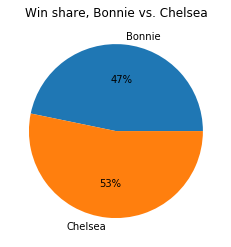

In [15]:
#Pie chart showing win share by player. Note that one game can have more than one winner.
#So the chart shows share of wins by player, not the % of games won by that player.
fig1,ax1=plt.subplots()
sizes=[Wins[p] for p in players]
ax1.pie(sizes,labels=players,autopct='%1.0f%%')
plt.title('Win share, Bonnie vs. Chelsea')
plt.show()

In [16]:
#Wins in 3-player with Adam
players=['Adam','Bonnie','Chelsea']
players_star=['*'+p for p in players]
Wins={}
for player in players:
    Wins[player]=0
for i in range(1000):
    random.shuffle(players_star)
    winners=Dominion.playgame(players_star,True)[0]
    for winner in winners:
        Wins[winner]+=1

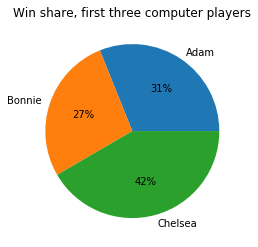

In [17]:
#Pie chart showing win share by player. Note that one game can have more than one winner.
#So the chart shows share of wins by player, not the % of games won by that player.
fig1,ax1=plt.subplots()
sizes=[Wins[p] for p in players]
ax1.pie(sizes,labels=players,autopct='%1.0f%%')
plt.title('Win share, first three computer players')
plt.show()

In [21]:
#4-player
players=['Bonnie','Bonnie','Chelsea','Chelsea']
players_star=['*'+p for p in players]
Wins={}
for player in players:
    Wins[player]=0
for i in range(1000):
    random.shuffle(players_star)
    winners=Dominion.playgame(players_star,True)[0]
    for winner in winners:
        Wins[winner]+=1

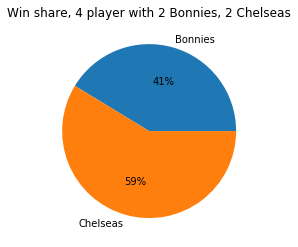

In [24]:
#Pie chart showing win share by player. Note that one game can have more than one winner.
#So the chart shows share of wins by player, not the % of games won by that player.
fig1,ax1=plt.subplots()
sizes=[Wins[p] for p in ['Bonnie','Chelsea']]
ax1.pie(sizes,labels=['Bonnies','Chelseas'],autopct='%1.0f%%')
plt.title('Win share, 4 player with 2 Bonnies, 2 Chelseas')
plt.show()